### **NeuroSYS** tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

Task 1.

In [2]:
conn = sqlite3.connect("database_1.db")
cur = conn.cursor()
# Get all tables names.
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = [x[0] for x in cur.fetchall()]
table_names

['data', 'connection', 'additional_data']

In [3]:
df_container = {}
for table in table_names:
    df_container[table] = pd.read_sql_query(
        f"SELECT * FROM {table}",
        conn
    )
# close db connection
conn.close()

Task 2.

In [4]:
# merged data
df = df_container['data'].merge(
    df_container['connection'],
    left_on = "connection_id",
    right_on = "id"
).merge(
    df_container['additional_data'],
    left_on="name",
    right_on="color_name"
)[['x', 'y', 'z', 'color_id', 'color_name']]

Quick 3D visualization of the source data.
It could help in the further analysis.

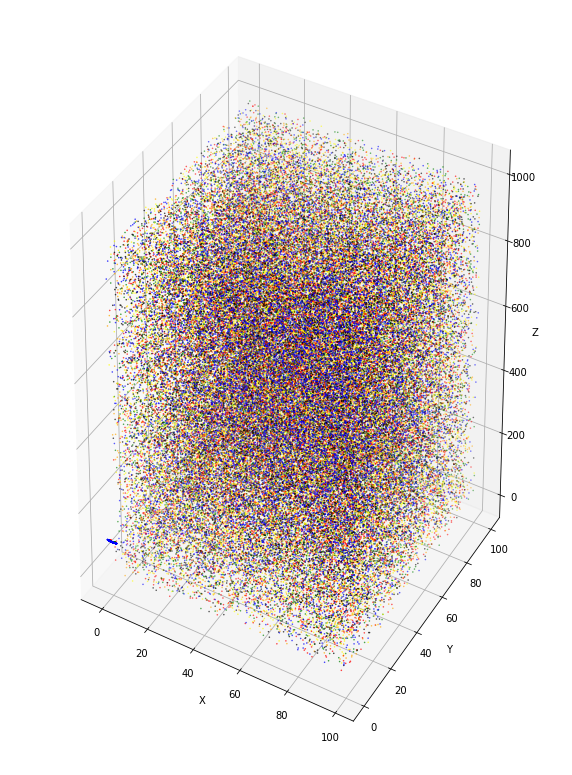

In [5]:
fig = plt.figure(figsize=(10,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.x, df.y.astype(np.float), df.z, s=0.3, c=df.color_name)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z');

Get the invalid data, in case we want to look at them.

In [6]:
df_bad = df_container['data'].merge(
    df_container['connection'],
    left_on = "connection_id",
    right_on = "id",
    how="left"
)
df_bad = df_bad[df_bad.isna().any(axis=1)]
df_bad.head()

,id_x,x,y,z,connection_id,id_y,name
11,12,0.0,gqxchrmigk,100.0,1,NaN,NaN
154,155,0.0,xmscnxchve,100.0,1,NaN,NaN
2055,2056,0.0,fxwcokaklc,100.0,1,NaN,NaN
2480,2481,0.0,lskpnspvll,100.0,1,NaN,NaN
3707,3708,0.0,imbdcncrep,100.0,1,NaN,NaN


Task 3.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101200 entries, 0 to 101199
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   x           101200 non-null  float64
 1   y           101200 non-null  object 
 2   z           101200 non-null  float64
 3   color_id    101200 non-null  int64  
 4   color_name  101200 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 4.6+ MB


In [8]:
# change y column the to float64
df.y = df.y.astype(np.float)

Task 4.

In [9]:
# check if there are any NaN in the columns
print(df.isna().any())

x             False
y             False
z             False
color_id      False
color_name    False
dtype: bool


There are no invalid records.

Task 5.

In [10]:
df.rename(columns={"color_name":"color"}, inplace=True)

Task 6.

In [11]:
df.color.unique()

array(['green', 'orange', 'yellow', 'red', 'black', 'blue'], dtype=object)

Task 7.

In [12]:
df = df[df.z == 100]

Task 8.

In [13]:
print(avg_red := df[df.color=="red"][['x', 'y']].mean().values)

[-1.          0.04346713]


In [14]:
df['red_distance'] = \
df.loc[df.color=="red",['x', 'y']].apply(
    lambda row: np.linalg.norm([row[0], row[1]] - avg_red),
    axis=1
)

In [15]:
df['red_distance_z_score'] = (df.red_distance - df.red_distance.mean()).abs()/df.red_distance.std()

In [16]:
df = df[~(df.red_distance_z_score > 1)]

Task 9.

In [17]:
df.reset_index(inplace=True)

Task 10.

In [18]:
df[["x", "y", "color"]].to_hdf("result.h5",key="ns1", mode="w")

Task 11.

In [19]:
data = pd.read_hdf("result.h5")
data.head()

,x,y,color
0,0.909091,0.034687,green
1,1.107071,0.016081,green
2,1.147475,0.089267,green
3,0.993939,0.004098,green
4,0.961616,0.092195,green


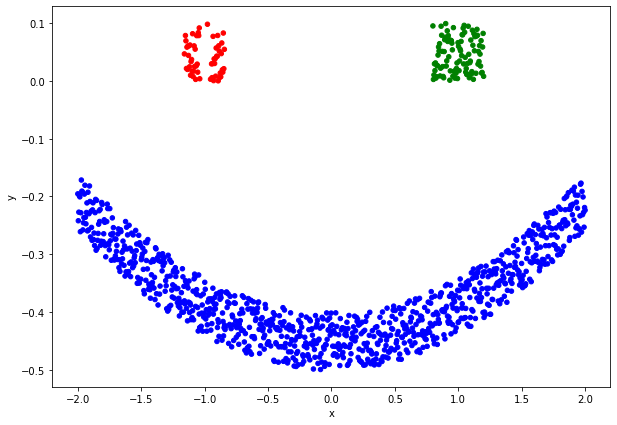

In [20]:
ax = data.plot.scatter(x="x", y="y", c="color", figsize=(10,7), colorbar=False)

In [21]:
ax.get_figure().savefig("result.png");